In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sv_machines.datasets.function_a import (
    function_a,
    get_function_a_dataset,
    get_function_a_plot,
)

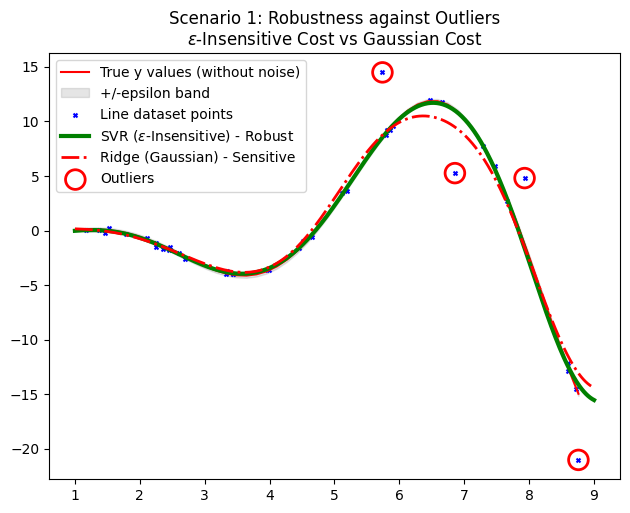

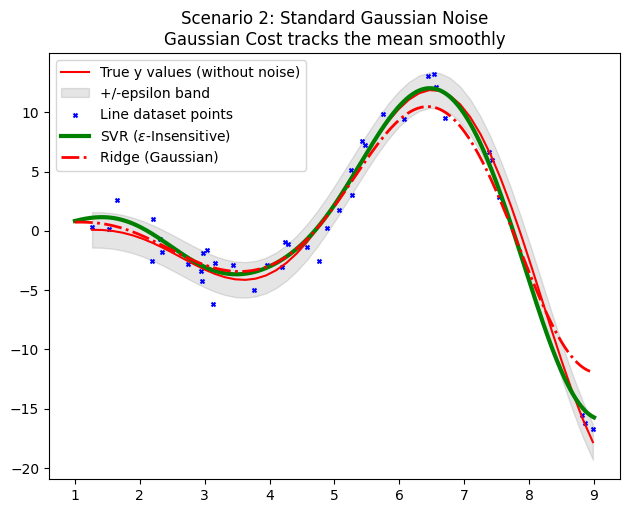

In [22]:
# --- SIMULATION AND PLOTTING ---

# Common parameters
np.random.seed(42)
X_RANGE = (1.0, 9.0)
NUM_POINTS = 40
EPSILON_BASE = 0.5
X_grid = np.linspace(X_RANGE[0], X_RANGE[1], 500).reshape(-1, 1)

# ==========================================
# SCENARIO 1: Robustness (Outliers)
# Description: Epsilon-Insensitive is better because it ignores large errors.
# ==========================================

# 1. Generate Base Data (Low noise)
X_outlier, y_outlier = get_function_a_dataset(
    epsilon=0.2, x_range=X_RANGE, num_points=NUM_POINTS, epsilon_strict=False
)

# 2. Add Heavy Outliers (Simulating Laplacian/Impulsive noise)
# We manually corrupt some points to be far outside the normal range
n_outliers = 4
outlier_indices = np.random.choice(NUM_POINTS, n_outliers, replace=False)
y_outlier[outlier_indices] += np.random.choice([-1, 1], size=n_outliers) * 6.0

# 3. Train Models
# SVR (Robust Cost Function)
svr_robust = SVR(kernel="rbf", C=10, gamma=0.5, epsilon=0.2)
svr_robust.fit(X_outlier.reshape(-1, 1), y_outlier)

# Kernel Ridge (Gaussian Cost Function - Sensitive to L2 error)
krr_sensitive = KernelRidge(kernel="rbf", alpha=0.5, gamma=0.5)
krr_sensitive.fit(X_outlier.reshape(-1, 1), y_outlier)

# 4. Plot
fig1, ax1 = get_function_a_plot(
    X_outlier, y_outlier, epsilon=0.2, with_true_function=True
)

ax1.plot(
    X_grid,
    svr_robust.predict(X_grid),
    color="green",
    linewidth=3,
    label=r"SVR ($\epsilon$-Insensitive) - Robust",
)
ax1.plot(
    X_grid,
    krr_sensitive.predict(X_grid),
    color="red",
    linewidth=2,
    linestyle="-.",
    label=r"Ridge (Gaussian) - Sensitive",
)

# Highlight outliers
ax1.scatter(
    X_outlier[outlier_indices],
    y_outlier[outlier_indices],
    s=200,
    facecolors="none",
    edgecolors="red",
    linewidth=2,
    label="Outliers",
)
ax1.set_title(
    r"Scenario 1: Robustness against Outliers"
    + "\n"
    + r"$\epsilon$-Insensitive Cost vs Gaussian Cost"
)
ax1.legend()


# ==========================================
# SCENARIO 2: Gaussian Noise
# Description: Gaussian Loss is optimal (MLE).
# ==========================================

# 1. Generate Gaussian Data
# Standard Normal distribution of noise
X_gauss, y_gauss = get_function_a_dataset(
    epsilon=1.5, x_range=X_RANGE, num_points=NUM_POINTS, epsilon_strict=False
)

# 2. Train Models
# SVR (Sparse) - Epsilon set to 1.0 (approx noise width)
svr_sparse = SVR(kernel="rbf", C=10, gamma=0.5, epsilon=1.0)
svr_sparse.fit(X_gauss.reshape(-1, 1), y_gauss)

# Kernel Ridge (Gaussian MLE) - Minimizes squared error
krr_mle = KernelRidge(kernel="rbf", alpha=1.0, gamma=0.5)
krr_mle.fit(X_gauss.reshape(-1, 1), y_gauss)

# 3. Plot
fig2, ax2 = get_function_a_plot(X_gauss, y_gauss, epsilon=1.5, with_true_function=True)

ax2.plot(
    X_grid,
    svr_sparse.predict(X_grid),
    color="green",
    linewidth=3,
    label=r"SVR ($\epsilon$-Insensitive)",
)
ax2.plot(
    X_grid,
    krr_mle.predict(X_grid),
    color="red",
    linewidth=2,
    linestyle="-.",
    label=r"Ridge (Gaussian)",
)

ax2.set_title(
    r"Scenario 2: Standard Gaussian Noise"
    + "\n"
    + r"Gaussian Cost tracks the mean smoothly"
)
ax2.legend()

plt.show()